<a href="https://colab.research.google.com/github/HuiWangCJLU/Model-Ensemble/blob/main/deep_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

导入数据

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics as ms
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree,linear_model
import graphviz 
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sc = StandardScaler()
data2 = pd.read_csv('smote(1).csv',index_col=None).dropna()
#X_i = data2[['pinc','ins1','ins4','ill','hospexp','illwork']].dropna()
#X_i = data2[['ill','chr','pinc','hospexp','dailyoin','illwork','illpinc','ins4','hosp']].dropna()
X_i = data2[['pinc','ill','chr','hosp','hospexp','illpinc']].dropna()
#X_i = data2[['chr','pinc','hospexp','dailyoin','know','illwork','illpinc','ins1','ins4','hosp','bc']].dropna()
sc.fit(X_i)
X = sc.transform(X_i)
#X = X_i.values
y = data2['pfi'].values

In [ ]:
data2 = pd.read_csv('test(2).csv',index_col=None).dropna()
X_i = data2[['pinc','ill','chr','hosp','hospexp','illpinc']]
#X_i = data2[['ill','chr','pinc','hospexp','dailyoin','illwork','illpinc','ins4','hosp']].dropna()
#X_i = data2[['chr','pinc','hospexp','dailyoin','know','illwork','illpinc','ins1','ins4','hosp','bc']].dropna()
sc.fit(X_i)
X_test = sc.transform(X_i)
X_test = X_i.values
y_test = data2['pfi'].values

# stacking deep learning

数据展示

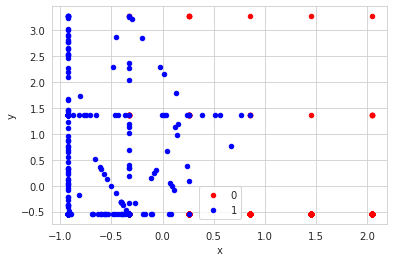

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2, random_state=2)
# scatter plot, dots colored by class value

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

构建网络一次

(688, 6) (459, 6)
Train: 0.965, Test: 0.959


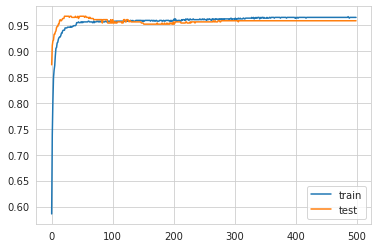

In [ ]:
# develop an mlp for blobs dataset
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
import pandas as pd
import numpy as np

from random import random
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, LSTM, Embedding
# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=2, n_features=6, cluster_std=2, random_state=2)
# one hot encode output variable
#y = to_categorical(y)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
trainX=X
trainy=to_categorical(y)
testX=X_test
testy=to_categorical(y_test)
print(trainX.shape, testX.shape)
# define model
model = Sequential()
model.add(Dense(25, input_dim=6, activation='relu'))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(1,activation='sigmoid'))
#model = Sequential()
#model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(6, 1)))
#model.add(Dropout(0.2))
#model.add(LSTM(units=50, activation='relu', return_sequences=False))
#model.add(Dropout(0.2))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

保存模型

In [ ]:
# example of saving sub-models for later use in a stacking ensemble
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from os import makedirs

# fit model on dataset
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=6, activation='relu'))
	model.add(Dense(2, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	#model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(6, 1)))
	#model.add(Dropout(0.2))
	#model.add(LSTM(units=50, activation='relu', return_sequences=False))
	#model.add(Dropout(0.2))
	#model.add(Dense(1, activation='sigmoid'))
	# Compile model
	#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	return model

# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=2, n_features=6, cluster_std=2, random_state=2)
# one hot encode output variable
#y = to_categorical(y)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
#print(trainX.shape, testX.shape)
# create directory for models
n_members = 5
trainX=X
trainy=to_categorical(y)
testX=X_test
testy=to_categorical(y_test)
makedirs('models')
# fit and save models
n_members = 5
for i in range(n_members):

	# fit model

	model = fit_model(trainX, trainy)
	y_predict = np.argmax(model.predict(testX), axis=-1)
	print(confusion_matrix(y_test, y_predict))
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

[[438   0]
 [ 20   1]]
>Saved models/model_1.h5
[[438   0]
 [ 21   0]]
>Saved models/model_2.h5
[[438   0]
 [ 19   2]]
>Saved models/model_3.h5
[[438   0]
 [ 20   1]]
>Saved models/model_4.h5
[[437   1]
 [ 18   3]]
>Saved models/model_5.h5


（可能要用到）

In [ ]:
trainX=X
trainy=to_categorical(y)
testX=X_test
testy=to_categorical(y_test)

导入模型

In [ ]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from numpy import dstack

# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=2, n_features=6, cluster_std=2, random_state=2)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
#print(trainX.shape, testX.shape)
# load all models
testy = y_test
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# evaluate standalone models on test dataset
for model in members:
	testy_enc = to_categorical(testy)
	_, acc = model.evaluate(testX, testy_enc, verbose=0)
  #tt=model.predict(testX)
	print('Model Accuracy: %.3f' % acc)
# fit stacked model using the ensemble
model = fit_stacked_model(members, testX, testy)
# evaluate model on test set
yhat = stacked_prediction(members, model, testX)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models
Model Accuracy: 0.946
Model Accuracy: 0.939
Model Accuracy: 0.950
Model Accuracy: 0.939
Model Accuracy: 0.939
Stacked Test Accuracy: 0.952


In [ ]:
# stacked generalization with neural net meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from numpy import argmax

# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(2, activation='softmax')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy_enc, epochs=300, verbose=0)

# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

# generate 2d classification dataset
#X, y = make_blobs(n_samples=1100, centers=2, n_features=6, cluster_std=2, random_state=2)
# split into train and test
#n_train = 100
#trainX, testX = X[:n_train, :], X[n_train:, :]
#trainy, testy = y[:n_train], y[n_train:]
trainX=X
trainy=y
testX=X_test
testy=y_test
print(trainX.shape, testX.shape)
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# define ensemble model
stacked_model = define_stacked_model(members)
# fit stacked model on test dataset
fit_stacked_model(stacked_model, testX, testy)
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, testX)
yhat = argmax(yhat, axis=1)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

(688, 6) (459, 6)
>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models
Stacked Test Accuracy: 0.961


输出混淆矩阵

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy, yhat)

array([[438,   0],
       [ 18,   3]])